## EDA

### a. Which country has the highest score? Why?

In [1]:
import pandas as pd

data = pd.read_csv("2023Data.csv")
print(f"Country with highest score: {data['Country name'].iloc[data['Ladder score'].idxmax()]}")
print(f"Score: {data['Ladder score'].max()}")

Country with highest score: Finland
Score: 7.804


Finland has the highest score of 7.804. Some potential reasons could be the high GDP per capita, social support, healthy life expectancy, and low perceptions of corruption in the country based on the feature values.

### b. Are there any null values? How does this dataset need to be cleaned?

In [2]:
print(data.isnull().sum())

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64


There is 3 null value in the 'Healthy life expectancy' column for the same row i.e. 'State of Palestine' row. This null value needs to be handled, either by imputing a value or removing the row if appropriate.

### c. Is there any correlation between the features?

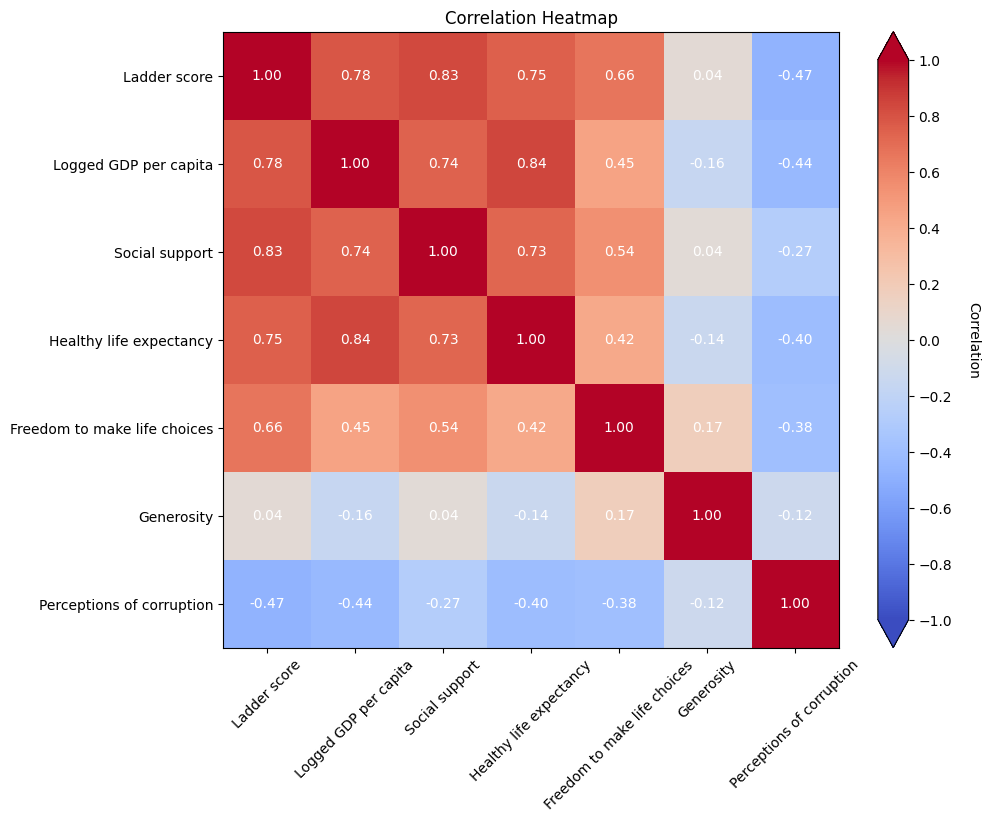

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Select relevant numerical features
numeric_features = ['Ladder score', 'Logged GDP per capita', 'Social support', 
                    'Healthy life expectancy', 'Freedom to make life choices', 
                    'Generosity', 'Perceptions of corruption']

# Compute correlation matrix
corr = data[numeric_features].corr()

# Plot correlation heatmap with values in each cell
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1, extent=[-0.5, len(numeric_features) - 0.5, len(numeric_features) - 0.5, -0.5])

# Add annotations
for i in range(len(numeric_features)):
    for j in range(len(numeric_features)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.xticks(np.arange(len(numeric_features)), numeric_features, rotation=45)
plt.yticks(np.arange(len(numeric_features)), numeric_features)
plt.title('Correlation Heatmap')

# Add color bar with specified scale
cbar = plt.colorbar(extend='both')
cbar.set_label('Correlation', rotation=270, labelpad=20)
cbar.set_ticks(np.linspace(-1, 1, 11))

plt.show()


The correlation heatmap shows the following:

'Ladder score' has a strong positive correlation with 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', and 'Freedom to make life choices'.
'Generosity' and 'Perceptions of corruption' have weaker correlations with 'Ladder score'.

### d. Are the minimum and maximum happiness scores reasonable? Are there any outliers?

In [ ]:
print(f"Minimum score: {data['Ladder score'].min()}")
print(f"Maximum score: {data['Ladder score'].max()}")

Minimum score: 1.859
Maximum score: 7.804


The minimum and maximum scores seem reasonable based on the 0-10 scale used for the 'Ladder score'. However, we can check for outliers using a box plot:

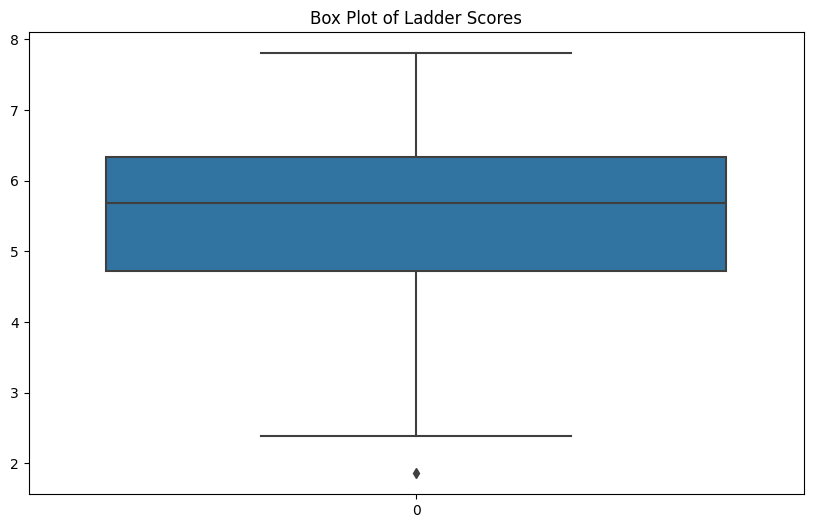

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Ladder score'])
plt.title('Box Plot of Ladder Scores')
plt.show()

The box plot shows a few potential outliers on the lower end of the 'Ladder score' distribution, but nothing too extreme.



### e. What is the mean happiness score?

In [ ]:
print(f"Mean ladder score: {data['Ladder score'].mean():.3f}")

Mean ladder score: 5.540


The mean happiness score across all countries is approximately 5.540.